# Adaptive Boosting

## Reference

In [ ]:
# https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones/data

## Import Libraries

In [52]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns


## Import Data

In [7]:

# Dataset Column Overview: 
# ------------------------------------------------------------------------------

# X001 :  tBodyAcc-mean()-X
# X002 :  tBodyAcc-mean()-Y
# X003 :  tBodyAcc-mean()-Z
# X004 :  tBodyAcc-std()-X
# X005 :  tBodyAcc-std()-Y
# X006 :  tBodyAcc-std()-Z
# X007 :  tBodyAcc-mad()-X
# X008 :  tBodyAcc-mad()-Y
# X009 :  tBodyAcc-mad()-Z
# X010 :  tBodyAcc-max()-X
# X011 :  tBodyAcc-max()-Y
# X012 :  tBodyAcc-max()-Z
# X013 :  tBodyAcc-min()-X
# X014 :  tBodyAcc-min()-Y
# X015 :  tBodyAcc-min()-Z
# X016 :  tBodyAcc-sma()
# X017 :  tBodyAcc-energy()-X
# X018 :  tBodyAcc-energy()-Y
# X019 :  tBodyAcc-energy()-Z
# X020 :  tBodyAcc-iqr()-X
# X021 :  tBodyAcc-iqr()-Y
# X022 :  tBodyAcc-iqr()-Z
# X023 :  tBodyAcc-entropy()-X
# X024 :  tBodyAcc-entropy()-Y
# X025 :  tBodyAcc-entropy()-Z
# X026 :  tBodyAcc-arCoeff()-X,1
# X027 :  tBodyAcc-arCoeff()-X,2
# X028 :  tBodyAcc-arCoeff()-X,3
# X029 :  tBodyAcc-arCoeff()-X,4
# X030 :  tBodyAcc-arCoeff()-Y,1
# X031 :  tBodyAcc-arCoeff()-Y,2
# X032 :  tBodyAcc-arCoeff()-Y,3
# X033 :  tBodyAcc-arCoeff()-Y,4
# X034 :  tBodyAcc-arCoeff()-Z,1
# X035 :  tBodyAcc-arCoeff()-Z,2
# X036 :  tBodyAcc-arCoeff()-Z,3
# X037 :  tBodyAcc-arCoeff()-Z,4
# X038 :  tBodyAcc-correlation()-X,Y
# X039 :  tBodyAcc-correlation()-X,Z
# X040 :  tBodyAcc-correlation()-Y,Z
# X041 :  tGravityAcc-mean()-X
# X042 :  tGravityAcc-mean()-Y
# X043 :  tGravityAcc-mean()-Z
# X044 :  tGravityAcc-std()-X
# X045 :  tGravityAcc-std()-Y
# X046 :  tGravityAcc-std()-Z
# X047 :  tGravityAcc-mad()-X
# X048 :  tGravityAcc-mad()-Y
# X049 :  tGravityAcc-mad()-Z
# X050 :  tGravityAcc-max()-X
# X051 :  tGravityAcc-max()-Y
# X052 :  tGravityAcc-max()-Z
# X053 :  tGravityAcc-min()-X
# X054 :  tGravityAcc-min()-Y
# X055 :  tGravityAcc-min()-Z
# X056 :  tGravityAcc-sma()
# X057 :  tGravityAcc-energy()-X
# X058 :  tGravityAcc-energy()-Y
# X059 :  tGravityAcc-energy()-Z
# X060 :  tGravityAcc-iqr()-X
# X061 :  tGravityAcc-iqr()-Y
# X062 :  tGravityAcc-iqr()-Z
# X063 :  tGravityAcc-entropy()-X
# X064 :  tGravityAcc-entropy()-Y
# X065 :  tGravityAcc-entropy()-Z
# X066 :  tGravityAcc-arCoeff()-X,1
# X067 :  tGravityAcc-arCoeff()-X,2
# X068 :  tGravityAcc-arCoeff()-X,3
# X069 :  tGravityAcc-arCoeff()-X,4
# X070 :  tGravityAcc-arCoeff()-Y,1
# X071 :  tGravityAcc-arCoeff()-Y,2
# X072 :  tGravityAcc-arCoeff()-Y,3
# X073 :  tGravityAcc-arCoeff()-Y,4
# X074 :  tGravityAcc-arCoeff()-Z,1
# X075 :  tGravityAcc-arCoeff()-Z,2
# X076 :  tGravityAcc-arCoeff()-Z,3
# X077 :  tGravityAcc-arCoeff()-Z,4
# X078 :  tGravityAcc-correlation()-X,Y
# X079 :  tGravityAcc-correlation()-X,Z
# X080 :  tGravityAcc-correlation()-Y,Z
# X081 :  tBodyAccJerk-mean()-X
# X082 :  tBodyAccJerk-mean()-Y
# X083 :  tBodyAccJerk-mean()-Z
# X084 :  tBodyAccJerk-std()-X
# X085 :  tBodyAccJerk-std()-Y
# X086 :  tBodyAccJerk-std()-Z
# X087 :  tBodyAccJerk-mad()-X
# X088 :  tBodyAccJerk-mad()-Y
# X089 :  tBodyAccJerk-mad()-Z
# X090 :  tBodyAccJerk-max()-X
# X091 :  tBodyAccJerk-max()-Y
# X092 :  tBodyAccJerk-max()-Z
# X093 :  tBodyAccJerk-min()-X
# X094 :  tBodyAccJerk-min()-Y
# X095 :  tBodyAccJerk-min()-Z
# X096 :  tBodyAccJerk-sma()
# X097 :  tBodyAccJerk-energy()-X
# X098 :  tBodyAccJerk-energy()-Y
# X099 :  tBodyAccJerk-energy()-Z
# X100 :  tBodyAccJerk-iqr()-X
# X101 :  tBodyAccJerk-iqr()-Y
# X102 :  tBodyAccJerk-iqr()-Z
# X103 :  tBodyAccJerk-entropy()-X
# X104 :  tBodyAccJerk-entropy()-Y
# X105 :  tBodyAccJerk-entropy()-Z
# X106 :  tBodyAccJerk-arCoeff()-X,1
# X107 :  tBodyAccJerk-arCoeff()-X,2
# X108 :  tBodyAccJerk-arCoeff()-X,3
# X109 :  tBodyAccJerk-arCoeff()-X,4
# X110 :  tBodyAccJerk-arCoeff()-Y,1
# X111 :  tBodyAccJerk-arCoeff()-Y,2
# X112 :  tBodyAccJerk-arCoeff()-Y,3
# X113 :  tBodyAccJerk-arCoeff()-Y,4
# X114 :  tBodyAccJerk-arCoeff()-Z,1
# X115 :  tBodyAccJerk-arCoeff()-Z,2
# X116 :  tBodyAccJerk-arCoeff()-Z,3
# X117 :  tBodyAccJerk-arCoeff()-Z,4
# X118 :  tBodyAccJerk-correlation()-X,Y
# X119 :  tBodyAccJerk-correlation()-X,Z
# X120 :  tBodyAccJerk-correlation()-Y,Z
# X121 :  tBodyGyro-mean()-X
# X122 :  tBodyGyro-mean()-Y
# X123 :  tBodyGyro-mean()-Z
# X124 :  tBodyGyro-std()-X
# X125 :  tBodyGyro-std()-Y
# X126 :  tBodyGyro-std()-Z
# X127 :  tBodyGyro-mad()-X
# X128 :  tBodyGyro-mad()-Y
# X129 :  tBodyGyro-mad()-Z
# X130 :  tBodyGyro-max()-X
# X131 :  tBodyGyro-max()-Y
# X132 :  tBodyGyro-max()-Z
# X133 :  tBodyGyro-min()-X
# X134 :  tBodyGyro-min()-Y
# X135 :  tBodyGyro-min()-Z
# X136 :  tBodyGyro-sma()
# X137 :  tBodyGyro-energy()-X
# X138 :  tBodyGyro-energy()-Y
# X139 :  tBodyGyro-energy()-Z
# X140 :  tBodyGyro-iqr()-X
# X141 :  tBodyGyro-iqr()-Y
# X142 :  tBodyGyro-iqr()-Z
# X143 :  tBodyGyro-entropy()-X
# X144 :  tBodyGyro-entropy()-Y
# X145 :  tBodyGyro-entropy()-Z
# X146 :  tBodyGyro-arCoeff()-X,1
# X147 :  tBodyGyro-arCoeff()-X,2
# X148 :  tBodyGyro-arCoeff()-X,3
# X149 :  tBodyGyro-arCoeff()-X,4
# X150 :  tBodyGyro-arCoeff()-Y,1
# X151 :  tBodyGyro-arCoeff()-Y,2
# X152 :  tBodyGyro-arCoeff()-Y,3
# X153 :  tBodyGyro-arCoeff()-Y,4
# X154 :  tBodyGyro-arCoeff()-Z,1
# X155 :  tBodyGyro-arCoeff()-Z,2
# X156 :  tBodyGyro-arCoeff()-Z,3
# X157 :  tBodyGyro-arCoeff()-Z,4
# X158 :  tBodyGyro-correlation()-X,Y
# X159 :  tBodyGyro-correlation()-X,Z
# X160 :  tBodyGyro-correlation()-Y,Z
# X161 :  tBodyGyroJerk-mean()-X
# X162 :  tBodyGyroJerk-mean()-Y
# X163 :  tBodyGyroJerk-mean()-Z
# X164 :  tBodyGyroJerk-std()-X
# X165 :  tBodyGyroJerk-std()-Y
# X166 :  tBodyGyroJerk-std()-Z
# X167 :  tBodyGyroJerk-mad()-X
# X168 :  tBodyGyroJerk-mad()-Y
# X169 :  tBodyGyroJerk-mad()-Z
# X170 :  tBodyGyroJerk-max()-X
# X171 :  tBodyGyroJerk-max()-Y
# X172 :  tBodyGyroJerk-max()-Z
# X173 :  tBodyGyroJerk-min()-X
# X174 :  tBodyGyroJerk-min()-Y
# X175 :  tBodyGyroJerk-min()-Z
# X176 :  tBodyGyroJerk-sma()
# X177 :  tBodyGyroJerk-energy()-X
# X178 :  tBodyGyroJerk-energy()-Y
# X179 :  tBodyGyroJerk-energy()-Z
# X180 :  tBodyGyroJerk-iqr()-X
# X181 :  tBodyGyroJerk-iqr()-Y
# X182 :  tBodyGyroJerk-iqr()-Z
# X183 :  tBodyGyroJerk-entropy()-X
# X184 :  tBodyGyroJerk-entropy()-Y
# X185 :  tBodyGyroJerk-entropy()-Z
# X186 :  tBodyGyroJerk-arCoeff()-X,1
# X187 :  tBodyGyroJerk-arCoeff()-X,2
# X188 :  tBodyGyroJerk-arCoeff()-X,3
# X189 :  tBodyGyroJerk-arCoeff()-X,4
# X190 :  tBodyGyroJerk-arCoeff()-Y,1
# X191 :  tBodyGyroJerk-arCoeff()-Y,2
# X192 :  tBodyGyroJerk-arCoeff()-Y,3
# X193 :  tBodyGyroJerk-arCoeff()-Y,4
# X194 :  tBodyGyroJerk-arCoeff()-Z,1
# X195 :  tBodyGyroJerk-arCoeff()-Z,2
# X196 :  tBodyGyroJerk-arCoeff()-Z,3
# X197 :  tBodyGyroJerk-arCoeff()-Z,4
# X198 :  tBodyGyroJerk-correlation()-X,Y
# X199 :  tBodyGyroJerk-correlation()-X,Z
# X200 :  tBodyGyroJerk-correlation()-Y,Z
# X201 :  tBodyAccMag-mean()
# X202 :  tBodyAccMag-std()
# X203 :  tBodyAccMag-mad()
# X204 :  tBodyAccMag-max()
# X205 :  tBodyAccMag-min()
# X206 :  tBodyAccMag-sma()
# X207 :  tBodyAccMag-energy()
# X208 :  tBodyAccMag-iqr()
# X209 :  tBodyAccMag-entropy()
# X210 :  tBodyAccMag-arCoeff()1
# X211 :  tBodyAccMag-arCoeff()2
# X212 :  tBodyAccMag-arCoeff()3
# X213 :  tBodyAccMag-arCoeff()4
# X214 :  tGravityAccMag-mean()
# X215 :  tGravityAccMag-std()
# X216 :  tGravityAccMag-mad()
# X217 :  tGravityAccMag-max()
# X218 :  tGravityAccMag-min()
# X219 :  tGravityAccMag-sma()
# X220 :  tGravityAccMag-energy()
# X221 :  tGravityAccMag-iqr()
# X222 :  tGravityAccMag-entropy()
# X223 :  tGravityAccMag-arCoeff()1
# X224 :  tGravityAccMag-arCoeff()2
# X225 :  tGravityAccMag-arCoeff()3
# X226 :  tGravityAccMag-arCoeff()4
# X227 :  tBodyAccJerkMag-mean()
# X228 :  tBodyAccJerkMag-std()
# X229 :  tBodyAccJerkMag-mad()
# X230 :  tBodyAccJerkMag-max()
# X231 :  tBodyAccJerkMag-min()
# X232 :  tBodyAccJerkMag-sma()
# X233 :  tBodyAccJerkMag-energy()
# X234 :  tBodyAccJerkMag-iqr()
# X235 :  tBodyAccJerkMag-entropy()
# X236 :  tBodyAccJerkMag-arCoeff()1
# X237 :  tBodyAccJerkMag-arCoeff()2
# X238 :  tBodyAccJerkMag-arCoeff()3
# X239 :  tBodyAccJerkMag-arCoeff()4
# X240 :  tBodyGyroMag-mean()
# X241 :  tBodyGyroMag-std()
# X242 :  tBodyGyroMag-mad()
# X243 :  tBodyGyroMag-max()
# X244 :  tBodyGyroMag-min()
# X245 :  tBodyGyroMag-sma()
# X246 :  tBodyGyroMag-energy()
# X247 :  tBodyGyroMag-iqr()
# X248 :  tBodyGyroMag-entropy()
# X249 :  tBodyGyroMag-arCoeff()1
# X250 :  tBodyGyroMag-arCoeff()2
# X251 :  tBodyGyroMag-arCoeff()3
# X252 :  tBodyGyroMag-arCoeff()4
# X253 :  tBodyGyroJerkMag-mean()
# X254 :  tBodyGyroJerkMag-std()
# X255 :  tBodyGyroJerkMag-mad()
# X256 :  tBodyGyroJerkMag-max()
# X257 :  tBodyGyroJerkMag-min()
# X258 :  tBodyGyroJerkMag-sma()
# X259 :  tBodyGyroJerkMag-energy()
# X260 :  tBodyGyroJerkMag-iqr()
# X261 :  tBodyGyroJerkMag-entropy()
# X262 :  tBodyGyroJerkMag-arCoeff()1
# X263 :  tBodyGyroJerkMag-arCoeff()2
# X264 :  tBodyGyroJerkMag-arCoeff()3
# X265 :  tBodyGyroJerkMag-arCoeff()4
# X266 :  fBodyAcc-mean()-X
# X267 :  fBodyAcc-mean()-Y
# X268 :  fBodyAcc-mean()-Z
# X269 :  fBodyAcc-std()-X
# X270 :  fBodyAcc-std()-Y
# X271 :  fBodyAcc-std()-Z
# X272 :  fBodyAcc-mad()-X
# X273 :  fBodyAcc-mad()-Y
# X274 :  fBodyAcc-mad()-Z
# X275 :  fBodyAcc-max()-X
# X276 :  fBodyAcc-max()-Y
# X277 :  fBodyAcc-max()-Z
# X278 :  fBodyAcc-min()-X
# X279 :  fBodyAcc-min()-Y
# X280 :  fBodyAcc-min()-Z
# X281 :  fBodyAcc-sma()
# X282 :  fBodyAcc-energy()-X
# X283 :  fBodyAcc-energy()-Y
# X284 :  fBodyAcc-energy()-Z
# X285 :  fBodyAcc-iqr()-X
# X286 :  fBodyAcc-iqr()-Y
# X287 :  fBodyAcc-iqr()-Z
# X288 :  fBodyAcc-entropy()-X
# X289 :  fBodyAcc-entropy()-Y
# X290 :  fBodyAcc-entropy()-Z
# X291 :  fBodyAcc-maxInds-X
# X292 :  fBodyAcc-maxInds-Y
# X293 :  fBodyAcc-maxInds-Z
# X294 :  fBodyAcc-meanFreq()-X
# X295 :  fBodyAcc-meanFreq()-Y
# X296 :  fBodyAcc-meanFreq()-Z
# X297 :  fBodyAcc-skewness()-X
# X298 :  fBodyAcc-kurtosis()-X
# X299 :  fBodyAcc-skewness()-Y
# X300 :  fBodyAcc-kurtosis()-Y
# X301 :  fBodyAcc-skewness()-Z
# X302 :  fBodyAcc-kurtosis()-Z
# X303 :  fBodyAcc-bandsEnergy()-1,8
# X304 :  fBodyAcc-bandsEnergy()-9,16
# X305 :  fBodyAcc-bandsEnergy()-17,24
# X306 :  fBodyAcc-bandsEnergy()-25,32
# X307 :  fBodyAcc-bandsEnergy()-33,40
# X308 :  fBodyAcc-bandsEnergy()-41,48
# X309 :  fBodyAcc-bandsEnergy()-49,56
# X310 :  fBodyAcc-bandsEnergy()-57,64
# X311 :  fBodyAcc-bandsEnergy()-1,16
# X312 :  fBodyAcc-bandsEnergy()-17,32
# X313 :  fBodyAcc-bandsEnergy()-33,48
# X314 :  fBodyAcc-bandsEnergy()-49,64
# X315 :  fBodyAcc-bandsEnergy()-1,24
# X316 :  fBodyAcc-bandsEnergy()-25,48
# X317 :  fBodyAcc-bandsEnergy()-1,8
# X318 :  fBodyAcc-bandsEnergy()-9,16
# X319 :  fBodyAcc-bandsEnergy()-17,24
# X320 :  fBodyAcc-bandsEnergy()-25,32
# X321 :  fBodyAcc-bandsEnergy()-33,40
# X322 :  fBodyAcc-bandsEnergy()-41,48
# X323 :  fBodyAcc-bandsEnergy()-49,56
# X324 :  fBodyAcc-bandsEnergy()-57,64
# X325 :  fBodyAcc-bandsEnergy()-1,16
# X326 :  fBodyAcc-bandsEnergy()-17,32
# X327 :  fBodyAcc-bandsEnergy()-33,48
# X328 :  fBodyAcc-bandsEnergy()-49,64
# X329 :  fBodyAcc-bandsEnergy()-1,24
# X330 :  fBodyAcc-bandsEnergy()-25,48
# X331 :  fBodyAcc-bandsEnergy()-1,8
# X332 :  fBodyAcc-bandsEnergy()-9,16
# X333 :  fBodyAcc-bandsEnergy()-17,24
# X334 :  fBodyAcc-bandsEnergy()-25,32
# X335 :  fBodyAcc-bandsEnergy()-33,40
# X336 :  fBodyAcc-bandsEnergy()-41,48
# X337 :  fBodyAcc-bandsEnergy()-49,56
# X338 :  fBodyAcc-bandsEnergy()-57,64
# X339 :  fBodyAcc-bandsEnergy()-1,16
# X340 :  fBodyAcc-bandsEnergy()-17,32
# X341 :  fBodyAcc-bandsEnergy()-33,48
# X342 :  fBodyAcc-bandsEnergy()-49,64
# X343 :  fBodyAcc-bandsEnergy()-1,24
# X344 :  fBodyAcc-bandsEnergy()-25,48
# X345 :  fBodyAccJerk-mean()-X
# X346 :  fBodyAccJerk-mean()-Y
# X347 :  fBodyAccJerk-mean()-Z
# X348 :  fBodyAccJerk-std()-X
# X349 :  fBodyAccJerk-std()-Y
# X350 :  fBodyAccJerk-std()-Z
# X351 :  fBodyAccJerk-mad()-X
# X352 :  fBodyAccJerk-mad()-Y
# X353 :  fBodyAccJerk-mad()-Z
# X354 :  fBodyAccJerk-max()-X
# X355 :  fBodyAccJerk-max()-Y
# X356 :  fBodyAccJerk-max()-Z
# X357 :  fBodyAccJerk-min()-X
# X358 :  fBodyAccJerk-min()-Y
# X359 :  fBodyAccJerk-min()-Z
# X360 :  fBodyAccJerk-sma()
# X361 :  fBodyAccJerk-energy()-X
# X362 :  fBodyAccJerk-energy()-Y
# X363 :  fBodyAccJerk-energy()-Z
# X364 :  fBodyAccJerk-iqr()-X
# X365 :  fBodyAccJerk-iqr()-Y
# X366 :  fBodyAccJerk-iqr()-Z
# X367 :  fBodyAccJerk-entropy()-X
# X368 :  fBodyAccJerk-entropy()-Y
# X369 :  fBodyAccJerk-entropy()-Z
# X370 :  fBodyAccJerk-maxInds-X
# X371 :  fBodyAccJerk-maxInds-Y
# X372 :  fBodyAccJerk-maxInds-Z
# X373 :  fBodyAccJerk-meanFreq()-X
# X374 :  fBodyAccJerk-meanFreq()-Y
# X375 :  fBodyAccJerk-meanFreq()-Z
# X376 :  fBodyAccJerk-skewness()-X
# X377 :  fBodyAccJerk-kurtosis()-X
# X378 :  fBodyAccJerk-skewness()-Y
# X379 :  fBodyAccJerk-kurtosis()-Y
# X380 :  fBodyAccJerk-skewness()-Z
# X381 :  fBodyAccJerk-kurtosis()-Z
# X382 :  fBodyAccJerk-bandsEnergy()-1,8
# X383 :  fBodyAccJerk-bandsEnergy()-9,16
# X384 :  fBodyAccJerk-bandsEnergy()-17,24
# X385 :  fBodyAccJerk-bandsEnergy()-25,32
# X386 :  fBodyAccJerk-bandsEnergy()-33,40
# X387 :  fBodyAccJerk-bandsEnergy()-41,48
# X388 :  fBodyAccJerk-bandsEnergy()-49,56
# X389 :  fBodyAccJerk-bandsEnergy()-57,64
# X390 :  fBodyAccJerk-bandsEnergy()-1,16
# X391 :  fBodyAccJerk-bandsEnergy()-17,32
# X392 :  fBodyAccJerk-bandsEnergy()-33,48
# X393 :  fBodyAccJerk-bandsEnergy()-49,64
# X394 :  fBodyAccJerk-bandsEnergy()-1,24
# X395 :  fBodyAccJerk-bandsEnergy()-25,48
# X396 :  fBodyAccJerk-bandsEnergy()-1,8
# X397 :  fBodyAccJerk-bandsEnergy()-9,16
# X398 :  fBodyAccJerk-bandsEnergy()-17,24
# X399 :  fBodyAccJerk-bandsEnergy()-25,32
# X400 :  fBodyAccJerk-bandsEnergy()-33,40
# X401 :  fBodyAccJerk-bandsEnergy()-41,48
# X402 :  fBodyAccJerk-bandsEnergy()-49,56
# X403 :  fBodyAccJerk-bandsEnergy()-57,64
# X404 :  fBodyAccJerk-bandsEnergy()-1,16
# X405 :  fBodyAccJerk-bandsEnergy()-17,32
# X406 :  fBodyAccJerk-bandsEnergy()-33,48
# X407 :  fBodyAccJerk-bandsEnergy()-49,64
# X408 :  fBodyAccJerk-bandsEnergy()-1,24
# X409 :  fBodyAccJerk-bandsEnergy()-25,48
# X410 :  fBodyAccJerk-bandsEnergy()-1,8
# X411 :  fBodyAccJerk-bandsEnergy()-9,16
# X412 :  fBodyAccJerk-bandsEnergy()-17,24
# X413 :  fBodyAccJerk-bandsEnergy()-25,32
# X414 :  fBodyAccJerk-bandsEnergy()-33,40
# X415 :  fBodyAccJerk-bandsEnergy()-41,48
# X416 :  fBodyAccJerk-bandsEnergy()-49,56
# X417 :  fBodyAccJerk-bandsEnergy()-57,64
# X418 :  fBodyAccJerk-bandsEnergy()-1,16
# X419 :  fBodyAccJerk-bandsEnergy()-17,32
# X420 :  fBodyAccJerk-bandsEnergy()-33,48
# X421 :  fBodyAccJerk-bandsEnergy()-49,64
# X422 :  fBodyAccJerk-bandsEnergy()-1,24
# X423 :  fBodyAccJerk-bandsEnergy()-25,48
# X424 :  fBodyGyro-mean()-X
# X425 :  fBodyGyro-mean()-Y
# X426 :  fBodyGyro-mean()-Z
# X427 :  fBodyGyro-std()-X
# X428 :  fBodyGyro-std()-Y
# X429 :  fBodyGyro-std()-Z
# X430 :  fBodyGyro-mad()-X
# X431 :  fBodyGyro-mad()-Y
# X432 :  fBodyGyro-mad()-Z
# X433 :  fBodyGyro-max()-X
# X434 :  fBodyGyro-max()-Y
# X435 :  fBodyGyro-max()-Z
# X436 :  fBodyGyro-min()-X
# X437 :  fBodyGyro-min()-Y
# X438 :  fBodyGyro-min()-Z
# X439 :  fBodyGyro-sma()
# X440 :  fBodyGyro-energy()-X
# X441 :  fBodyGyro-energy()-Y
# X442 :  fBodyGyro-energy()-Z
# X443 :  fBodyGyro-iqr()-X
# X444 :  fBodyGyro-iqr()-Y
# X445 :  fBodyGyro-iqr()-Z
# X446 :  fBodyGyro-entropy()-X
# X447 :  fBodyGyro-entropy()-Y
# X448 :  fBodyGyro-entropy()-Z
# X449 :  fBodyGyro-maxInds-X
# X450 :  fBodyGyro-maxInds-Y
# X451 :  fBodyGyro-maxInds-Z
# X452 :  fBodyGyro-meanFreq()-X
# X453 :  fBodyGyro-meanFreq()-Y
# X454 :  fBodyGyro-meanFreq()-Z
# X455 :  fBodyGyro-skewness()-X
# X456 :  fBodyGyro-kurtosis()-X
# X457 :  fBodyGyro-skewness()-Y
# X458 :  fBodyGyro-kurtosis()-Y
# X459 :  fBodyGyro-skewness()-Z
# X460 :  fBodyGyro-kurtosis()-Z
# X461 :  fBodyGyro-bandsEnergy()-1,8
# X462 :  fBodyGyro-bandsEnergy()-9,16
# X463 :  fBodyGyro-bandsEnergy()-17,24
# X464 :  fBodyGyro-bandsEnergy()-25,32
# X465 :  fBodyGyro-bandsEnergy()-33,40
# X466 :  fBodyGyro-bandsEnergy()-41,48
# X467 :  fBodyGyro-bandsEnergy()-49,56
# X468 :  fBodyGyro-bandsEnergy()-57,64
# X469 :  fBodyGyro-bandsEnergy()-1,16
# X470 :  fBodyGyro-bandsEnergy()-17,32
# X471 :  fBodyGyro-bandsEnergy()-33,48
# X472 :  fBodyGyro-bandsEnergy()-49,64
# X473 :  fBodyGyro-bandsEnergy()-1,24
# X474 :  fBodyGyro-bandsEnergy()-25,48
# X475 :  fBodyGyro-bandsEnergy()-1,8
# X476 :  fBodyGyro-bandsEnergy()-9,16
# X477 :  fBodyGyro-bandsEnergy()-17,24
# X478 :  fBodyGyro-bandsEnergy()-25,32
# X479 :  fBodyGyro-bandsEnergy()-33,40
# X480 :  fBodyGyro-bandsEnergy()-41,48
# X481 :  fBodyGyro-bandsEnergy()-49,56
# X482 :  fBodyGyro-bandsEnergy()-57,64
# X483 :  fBodyGyro-bandsEnergy()-1,16
# X484 :  fBodyGyro-bandsEnergy()-17,32
# X485 :  fBodyGyro-bandsEnergy()-33,48
# X486 :  fBodyGyro-bandsEnergy()-49,64
# X487 :  fBodyGyro-bandsEnergy()-1,24
# X488 :  fBodyGyro-bandsEnergy()-25,48
# X489 :  fBodyGyro-bandsEnergy()-1,8
# X490 :  fBodyGyro-bandsEnergy()-9,16
# X491 :  fBodyGyro-bandsEnergy()-17,24
# X492 :  fBodyGyro-bandsEnergy()-25,32
# X493 :  fBodyGyro-bandsEnergy()-33,40
# X494 :  fBodyGyro-bandsEnergy()-41,48
# X495 :  fBodyGyro-bandsEnergy()-49,56
# X496 :  fBodyGyro-bandsEnergy()-57,64
# X497 :  fBodyGyro-bandsEnergy()-1,16
# X498 :  fBodyGyro-bandsEnergy()-17,32
# X499 :  fBodyGyro-bandsEnergy()-33,48
# X500 :  fBodyGyro-bandsEnergy()-49,64
# X501 :  fBodyGyro-bandsEnergy()-1,24
# X502 :  fBodyGyro-bandsEnergy()-25,48
# X503 :  fBodyAccMag-mean()
# X504 :  fBodyAccMag-std()
# X505 :  fBodyAccMag-mad()
# X506 :  fBodyAccMag-max()
# X507 :  fBodyAccMag-min()
# X508 :  fBodyAccMag-sma()
# X509 :  fBodyAccMag-energy()
# X510 :  fBodyAccMag-iqr()
# X511 :  fBodyAccMag-entropy()
# X512 :  fBodyAccMag-maxInds
# X513 :  fBodyAccMag-meanFreq()
# X514 :  fBodyAccMag-skewness()
# X515 :  fBodyAccMag-kurtosis()
# X516 :  fBodyBodyAccJerkMag-mean()
# X517 :  fBodyBodyAccJerkMag-std()
# X518 :  fBodyBodyAccJerkMag-mad()
# X519 :  fBodyBodyAccJerkMag-max()
# X520 :  fBodyBodyAccJerkMag-min()
# X521 :  fBodyBodyAccJerkMag-sma()
# X522 :  fBodyBodyAccJerkMag-energy()
# X523 :  fBodyBodyAccJerkMag-iqr()
# X524 :  fBodyBodyAccJerkMag-entropy()
# X525 :  fBodyBodyAccJerkMag-maxInds
# X526 :  fBodyBodyAccJerkMag-meanFreq()
# X527 :  fBodyBodyAccJerkMag-skewness()
# X528 :  fBodyBodyAccJerkMag-kurtosis()
# X529 :  fBodyBodyGyroMag-mean()
# X530 :  fBodyBodyGyroMag-std()
# X531 :  fBodyBodyGyroMag-mad()
# X532 :  fBodyBodyGyroMag-max()
# X533 :  fBodyBodyGyroMag-min()
# X534 :  fBodyBodyGyroMag-sma()
# X535 :  fBodyBodyGyroMag-energy()
# X536 :  fBodyBodyGyroMag-iqr()
# X537 :  fBodyBodyGyroMag-entropy()
# X538 :  fBodyBodyGyroMag-maxInds
# X539 :  fBodyBodyGyroMag-meanFreq()
# X540 :  fBodyBodyGyroMag-skewness()
# X541 :  fBodyBodyGyroMag-kurtosis()
# X542 :  fBodyBodyGyroJerkMag-mean()
# X543 :  fBodyBodyGyroJerkMag-std()
# X544 :  fBodyBodyGyroJerkMag-mad()
# X545 :  fBodyBodyGyroJerkMag-max()
# X546 :  fBodyBodyGyroJerkMag-min()
# X547 :  fBodyBodyGyroJerkMag-sma()
# X548 :  fBodyBodyGyroJerkMag-energy()
# X549 :  fBodyBodyGyroJerkMag-iqr()
# X550 :  fBodyBodyGyroJerkMag-entropy()
# X551 :  fBodyBodyGyroJerkMag-maxInds
# X552 :  fBodyBodyGyroJerkMag-meanFreq()
# X553 :  fBodyBodyGyroJerkMag-skewness()
# X554 :  fBodyBodyGyroJerkMag-kurtosis()
# X555 :  angle(tBodyAccMean,gravity)
# X556 :  angle(tBodyAccJerkMean),gravityMean)
# X557 :  angle(tBodyGyroMean,gravityMean)
# X558 :  angle(tBodyGyroJerkMean,gravityMean)
# X559 :  angle(X,gravityMean)
# X560 :  angle(Y,gravityMean)
# X561 :  angle(Z,gravityMean)
# X562 :  subject
#    y :  Activity




path1 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/human_activity_recognition_test.csv'
path2 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/human_activity_recognition_train_1.csv'
path3 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/human_activity_recognition_train_2.csv'

human_test = pd.read_csv(path1)
human_train1 = pd.read_csv(path2)
human_train2 = pd.read_csv(path3)

In [13]:
human_train1.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [12]:
human_train2.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [11]:
human_test.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [14]:
human_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 15.7+ MB


In [17]:
# find the feature which is object
human_test.select_dtypes('object').columns

Index(['Activity'], dtype='object')

In [19]:
human_test['Activity'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [21]:
human_train1['Activity'].value_counts()

STANDING              691
WALKING               655
LAYING                648
SITTING               600
WALKING_UPSTAIRS      557
WALKING_DOWNSTAIRS    504
Name: Activity, dtype: int64

In [22]:
human_train2['Activity'].value_counts()

LAYING                759
SITTING               686
STANDING              683
WALKING               571
WALKING_UPSTAIRS      516
WALKING_DOWNSTAIRS    482
Name: Activity, dtype: int64

In [24]:
# join train1 and train2
huamn_train = pd.concat([human_train1, human_train2], axis = 0,ignore_index = True)
huamn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [25]:
huamn_train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

## Normalize the Data

In [45]:
# get the features name
cond = huamn_train.columns == 'Activity'
feature_name = huamn_train.columns[~cond]
# normalize the huamn_train features
st = StandardScaler()
normalize_huamn_train= pd.DataFrame(st.fit_transform(huamn_train[feature_name]), columns = feature_name)
normalize_huamn_train['Activity'] = huamn_train['Activity']
normalize_huamn_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,-1.828851,STANDING
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,-1.828851,STANDING
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,-1.828851,STANDING
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,-1.828851,STANDING
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,-1.828851,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984,1.402515,WALKING_UPSTAIRS
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820,1.402515,WALKING_UPSTAIRS
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709,1.402515,WALKING_UPSTAIRS
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276,1.402515,WALKING_UPSTAIRS


## Visual the Data 

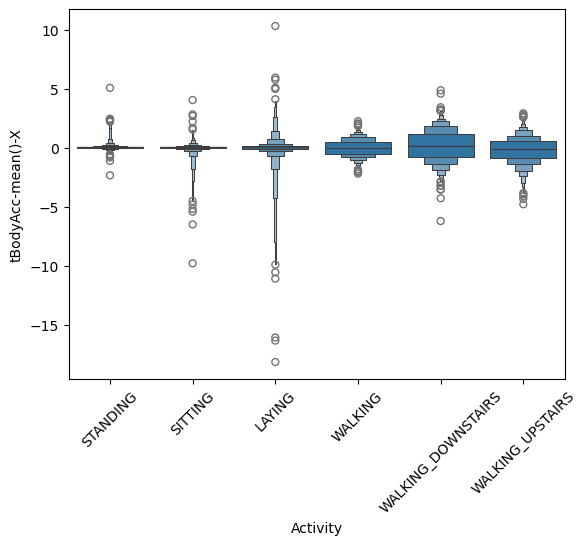

In [50]:
fig, ax = plt.subplots(nrows = )

for i in feature_name:
  sns.boxenplot(data = normalize_huamn_train, y = iee, x = 'Activity')
plt.xticks(rotation = 45)
plt.show()

In [56]:
import scipy.stats
